In [1]:
%cd stable-diffusion

/stable-diffusion


In [3]:
cd ../

/


In [7]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="/hy-tmp/stable-diffusion/chinese_landscape_paintings", split="train")
dataset[0]["text"]

Resolving data files:   0%|          | 0/3561 [00:00<?, ?it/s]

Using custom data configuration default-fcbcfc4a4645241a
Reusing dataset imagefolder (/root/.cache/huggingface/datasets/imagefolder/default-fcbcfc4a4645241a/0.0.0/0fc50c79b681877cc46b23245a6ef5333d036f48db40d53765a68034bc48faff)


'a chinese lanscape painting of a waterfall and trees'

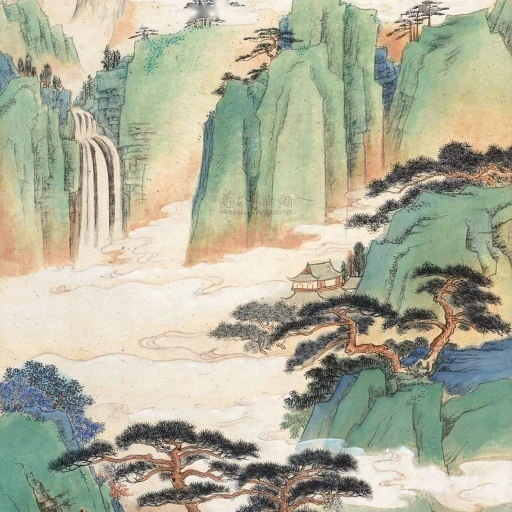

In [8]:
dataset[0]['image']

In [9]:
ckpt_path = "/hy-tmp/sd-v1-4-full-ema.ckpt"

In [10]:
# 2xA6000:
BATCH_SIZE = 4
N_GPUS = 1
ACCUMULATE_BATCHES = 1

gpu_list = ",".join((str(x) for x in range(N_GPUS)))+","
print(f"Using GPUs: {gpu_list}")

Using GPUs: 0,


In [11]:
cd /hy-tmp/stable-diffusion

/hy-tmp/stable-diffusion


In [12]:
# Run training
!(python main.py \
    -t \
    --base configs/stable-diffusion/landscape_paintings.yaml \
    --gpus "$gpu_list" \
    --scale_lr False \
    --num_nodes 1 \
    --check_val_every_n_epoch 1 \
    --finetune_from "$ckpt_path" \
    data.params.batch_size="$BATCH_SIZE" \
    lightning.trainer.accumulate_grad_batches="$ACCUMULATE_BATCHES" \
    data.params.validation.params.n_gpus="$N_GPUS" \
)

Global seed set to 23
Running on GPUs 0,
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.9.layer_norm1.weight', 'vision_model.encoder.layers.5.self_attn.v_proj.weight', 'vision_model.encoder.layers.17.self_attn.k_proj.weight', 'vision_model.encoder.layers.20.self_attn.q_proj.bias', 'vision_model.encoder.layers.11.layer_norm2.weight', 'vision_model.encoder.layers.2.self_attn.q_proj.bias', 'vision_model.encoder.layers.4.self_attn.k_proj.weight', 'vision_model.encoder.layers.22.self_attn.k_proj.bias', 'vision_model.encoder.layers.10.layer_norm1.bias', 'vision_model.encoder.layers.15.layer_norm2.bias', 'vision_model.enco

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



DDIM Sampler:  47%|█████████████               | 93/199 [00:47<00:54,  1.96it/s]

DDIM Sampler:  47%|█████████████▏              | 94/199 [00:47<00:53,  1.96it/s]

DDIM Sampler:  48%|█████████████▎              | 95/199 [00:48<00:53,  1.96it/s]

DDIM Sampler:  48%|█████████████▌              | 96/199 [00:48<00:52,  1.96it/s]

DDIM Sampler:  49%|█████████████▋              | 97/199 [00:49<00:52,  1.96it/s]

DDIM Sampler:  49%|█████████████▊              | 98/199 [00:49<00:51,  1.96it/s]

DDIM Sampler:  50%|█████████████▉              | 99/199 [00:50<00:51,  1.96it/s]

DDIM Sampler:  50%|█████████████▌             | 100/199 [00:50<00:50,  1.96it/s]

DDIM Sampler:  51%|█████████████▋             | 101/199 [00:51<00:50,  1.96it/s]

DDIM Sampler:  51%|█████████████▊             | 102/199 [00:51<00:49,  1.96it/s]

DDIM Sampler:  52%|█████████████▉             | 103/199 [00:52<00:49,  1.96it/s]

DDIM Sampler:  52%|██████████████             | 104/199 [00:53<00:48,  1.96it/s]

DDIM Sampler:  5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 34: 100%|▉| 890/891 [21:44<00:01,  1.46s/it, loss=0.201, v_num=0, train/lo
Validating: 0it [00:00, ?it/s]
Validating:   0%|                                         | 0/1 [00:00<?, ?it/s]Sampling: Switched to EMA weights
Data shape for DDIM sampling is (4, 4, 64, 64), eta 1.0
Running DDIM Sampling with 199 timesteps


DDIM Sampler:   0%|                                     | 0/199 [00:00<?, ?it/s]

DDIM Sampler:   1%|▏                            | 1/199 [00:00<00:51,  3.84it/s]

DDIM Sampler:   1%|▎                            | 2/199 [00:00<00:51,  3.84it/s]

DDIM Sampler:   2%|▍                            | 3/199 [00:00<00:51,  3.84it/s]

DDIM Sampler:   2%|▌                            | 4/199 [00:01<00:50,  3.84it/s]

DDIM Sampler:   3%|▋                            | 5/199 [00:01<00:50,  3.84it/s]

DDIM Sampler:   3%|▊                            | 6/199 [00:01<00:50,  3.83it/s]

DDIM Sampler:   4%|█                            | 7/199 [00:01<00:50,  3.83it/s]

DDIM Sampler:   4%|

In [16]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'a chinese landscape painting of a landscape with mountains and a river' \
    --outdir 'outputs/generated_pl' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/landscape_paintings.yaml' \
    --ckpt 'logs/2022-11-01T17-08-20_landscape_paintings/checkpoints/last.ckpt')

Global seed set to 42
Loading model from logs/2022-11-01T17-08-20_landscape_paintings/checkpoints/last.ckpt
Global Step: 30000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.5.layer_norm2.bias', 'vision_model.encoder.layers.21.mlp.fc2.weight', 'vision_model.encoder.layers.12.self_attn.v_proj.bias', 'vision_model.encoder.layers.3.mlp.fc2.weight', 'vision_model.encoder.layers.5.mlp.fc2.weight', 'vision_model.encoder.layers.6.mlp.fc1.weight', 'vision_model.encoder.layers.14.self_attn.q_proj.bias', 'vision_model.encoder.layers.18.self_attn.out_proj.weight', 'vision_model.encoder.layers.10.layer_norm2.bias', 'vision_mode

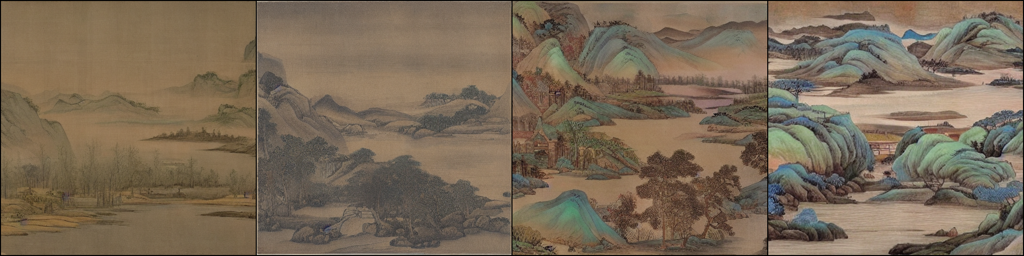

a chinese lanscape painting of a landscape with mountains and a river


In [18]:
from PIL import Image
im = Image.open("outputs/generated_pl/grid-0000.png").resize((1024, 256))
display(im)
print("a chinese landscape painting of a landscape with mountains and a river")

In [19]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'a chinese landscape painting of a mountain with trees on it' \
    --outdir 'outputs/generated_pl' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/landscape_paintings.yaml' \
    --ckpt 'logs/2022-11-01T17-08-20_landscape_paintings/checkpoints/last.ckpt')

Global seed set to 42
Loading model from logs/2022-11-01T17-08-20_landscape_paintings/checkpoints/last.ckpt
Global Step: 30000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.14.self_attn.q_proj.weight', 'vision_model.encoder.layers.3.layer_norm1.weight', 'vision_model.encoder.layers.5.mlp.fc1.weight', 'vision_model.encoder.layers.19.mlp.fc1.weight', 'vision_model.encoder.layers.12.mlp.fc1.weight', 'text_projection.weight', 'vision_model.encoder.layers.10.mlp.fc2.bias', 'vision_model.encoder.layers.13.layer_norm2.bias', 'vision_model.encoder.layers.9.layer_norm1.weight', 'vision_model.encoder.layers.15.self_attn.k_pr

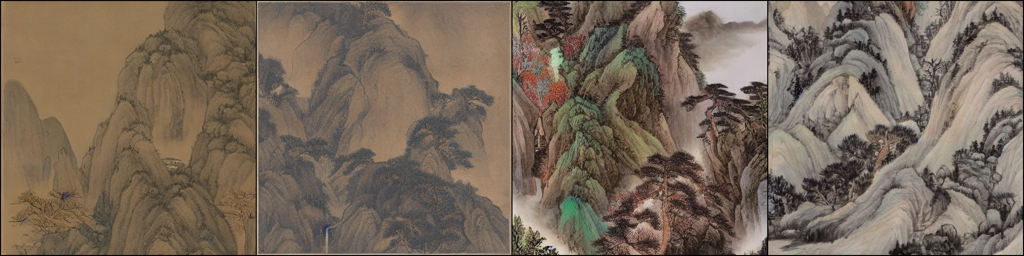

a chinese lanscape painting of a mountain with trees on it


In [21]:
from PIL import Image
im = Image.open("outputs/generated_pl/grid-0002.png").resize((1024, 256))
display(im)
print("a chinese landscape painting of a mountain with trees on it")

In [28]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'a chinese landscape painting of a building with trees in front of it' \
    --outdir 'outputs/generated_pl' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/landscape_paintings.yaml' \
    --ckpt 'logs/2022-11-01T17-08-20_landscape_paintings/checkpoints/last.ckpt')


Global seed set to 42
Loading model from logs/2022-11-01T17-08-20_landscape_paintings/checkpoints/last.ckpt
Global Step: 30000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.8.mlp.fc2.weight', 'vision_model.embeddings.patch_embedding.weight', 'vision_model.post_layernorm.bias', 'vision_model.encoder.layers.14.mlp.fc2.weight', 'vision_model.encoder.layers.10.layer_norm1.bias', 'vision_model.encoder.layers.7.self_attn.k_proj.bias', 'vision_model.encoder.layers.17.mlp.fc2.weight', 'vision_model.encoder.layers.7.mlp.fc1.bias', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.11.layer_norm1.weig

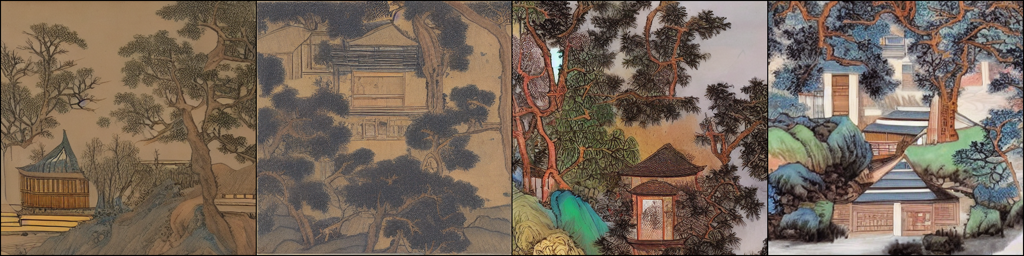

a chinese landscape painting of a building with trees in front of it


In [30]:
from PIL import Image
im = Image.open("outputs/generated_pl/grid-0006.png").resize((1024, 256))
display(im)
print("a chinese landscape painting of a building with trees in front of it")

In [26]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'a chinese landscape painting of a man standing on top of a cliff' \
    --outdir 'outputs/generated_pl' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/landscape_paintings.yaml' \
    --ckpt 'logs/2022-11-01T17-08-20_landscape_paintings/checkpoints/last.ckpt')

Global seed set to 42
Loading model from logs/2022-11-01T17-08-20_landscape_paintings/checkpoints/last.ckpt
Global Step: 30000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.1.self_attn.k_proj.bias', 'vision_model.encoder.layers.3.self_attn.k_proj.bias', 'vision_model.encoder.layers.4.self_attn.out_proj.weight', 'vision_model.encoder.layers.11.mlp.fc1.weight', 'text_projection.weight', 'vision_model.encoder.layers.22.layer_norm1.bias', 'vision_model.encoder.layers.7.mlp.fc2.weight', 'vision_model.encoder.layers.10.self_attn.k_proj.weight', 'vision_model.encoder.layers.3.mlp.fc2.weight', 'vision_model.encoder.layers.

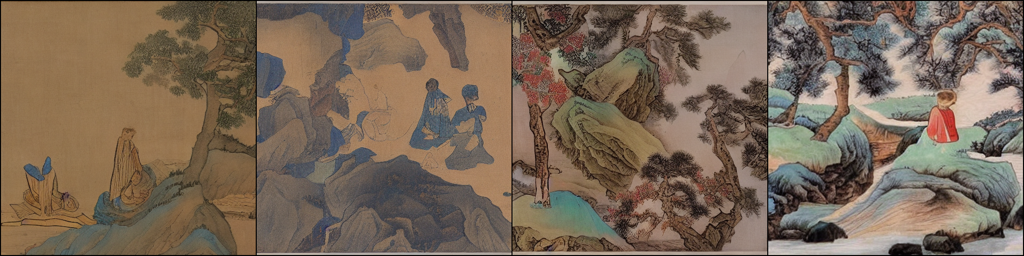

a chinese lanscape painting of a man standing on top of a cliff


In [27]:
from PIL import Image
im = Image.open("outputs/generated_pl/grid-0005.png").resize((1024, 256))
display(im)
print("a chinese landscape painting of a man standing on top of a cliff")